# Extraction des points d'intérêts 



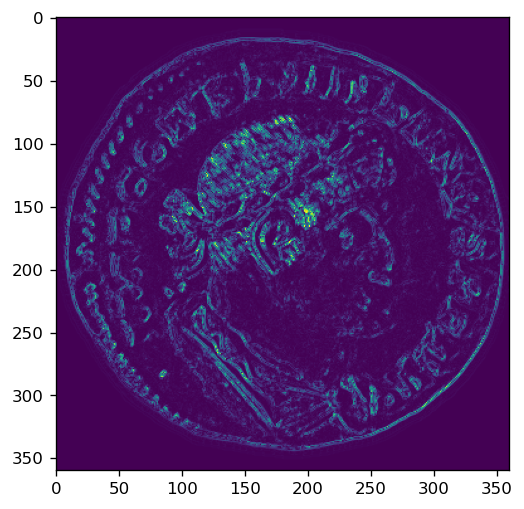

In [1]:
%load_ext autoreload
%autoreload 2

import ImageProcessing.processing as pr
import numpy as np
import matplotlib.pyplot as plt
import cv2

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 120

imgPath = imagePath = "data/19_Droit.jpg"

#Utilisation du paquet
img =pr.cropToCoin(imgPath)
contours = pr.getContour(img)

plt.imshow(contours)
plt.show()

In [2]:
from FeaturesExtractor.misc import *
from FeaturesExtractor import Kernel as k
### Création du noyeau 

shape=np.shape(contours)

#Vecteur contenant les coordonnées de chaque pixel
Xvec = XVecFromArray(contours)

#Vecteur de poids
weightVec = contours.ravel()

#longeur caractéristique
l = 3

#Optimisation des calculs
threshold = 30


ker = k.Kernel(weightVec,Xvec,l,threshold)

varVect = ker.getVarVector()

varMap = np.reshape(varVect,shape)



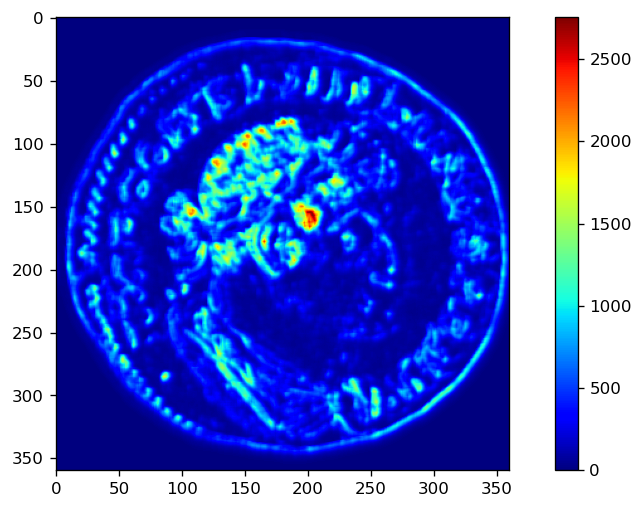

In [3]:
plt.imshow(varMap,cmap='jet')
plt.colorbar()
plt.show()


In [4]:
lListe = [1,3,7]
n = len(lListe)

varMapListe = []

for idx in range(n) :
    l = lListe[idx]
    ker = k.Kernel(weightVec,Xvec,l,threshold)
    varVect = ker.getVarVector()
    varMap = np.reshape(varVect,shape)
    varMapListe.append(varMap)
    
    

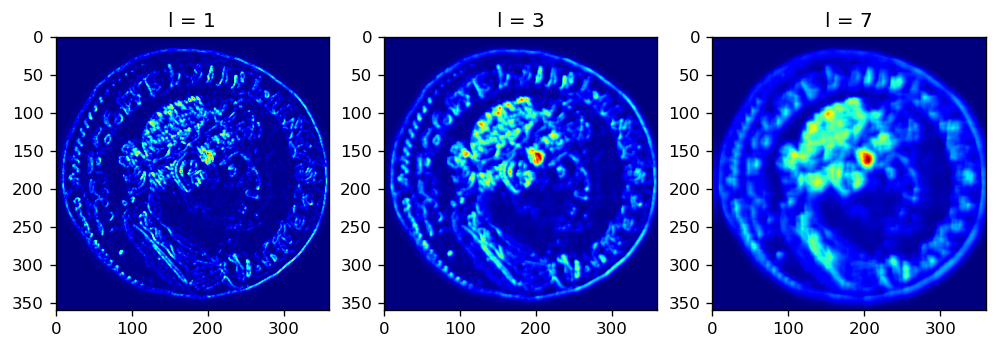

In [5]:
### Influence du paramètre l

for idx in range(n) :
    plt.subplot(1,n,idx+1)
    plt.title("l = "+ str(lListe[idx]))
    plt.imshow(varMapListe[idx],cmap='jet')


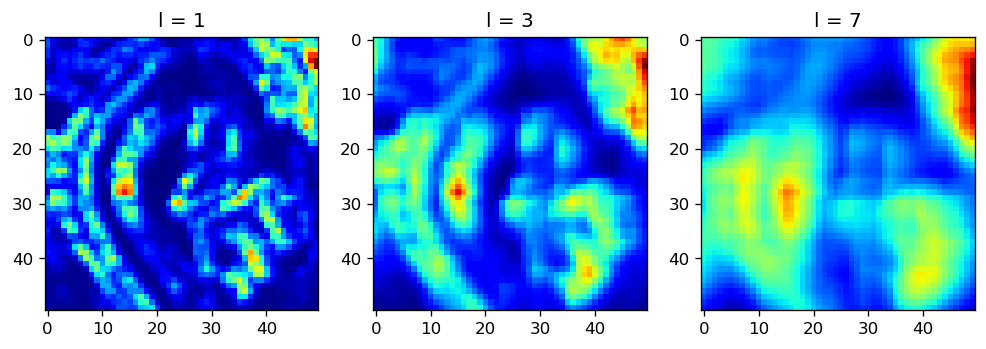

In [6]:
##Zoom sur l'image
for idx in range(n) :
    plt.subplot(1,n,idx+1)
    plt.title("l = "+ str(lListe[idx]))
    plt.imshow(varMapListe[idx][150:200,150:200],cmap='jet')

In [12]:
l = 2
threshold = 2000
ker = k.Kernel(weightVec,Xvec,l,threshold)
varVect = ker.getVarVector()
varMap = np.reshape(varVect,shape)


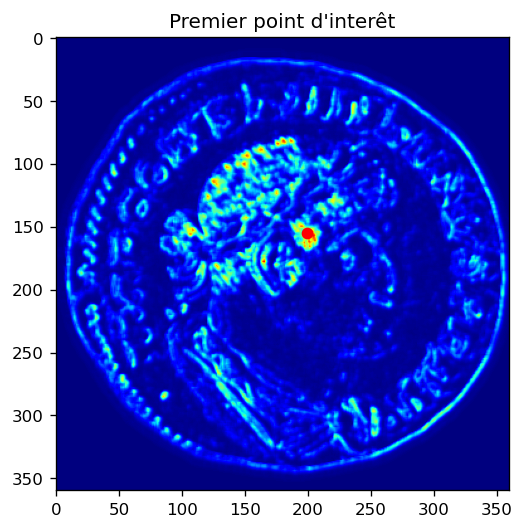

In [13]:
### Objet feature extractor
from FeaturesExtractor import Features as f

ext = f.Extractor(varVect,ker)

# index de la première feature 
idx = ext.getIndexFirstFeature()


y,x = Xvec[idx]

plt.imshow(varMap,cmap='jet')
plt.scatter(x,y,color='r')
plt.title("Premier point d'interêt")
plt.show()


In [ ]:
## Mise a jour de la feature liste
import time


start = time.time()
ext.addFeature(idx)
dt = time.time()-start

print(dt)

Ajout de Feature :
fonction covWithXsi
0 / 129600
100 / 129600


In [11]:
varVect = ext.getVarVector()
varMap = np.reshape(varVect,shape)
plt.imshow(varMap,cmap='jet')
plt.title("Premier point d'interêt")
plt.show()

Utilisation de Var Vect2


MemoryError: Unable to allocate 125. GiB for an array with shape (129600, 129600) and data type float64